## Parcialitos

#### Importe de datos

In [ ]:
import numpy as np
import tensorflow as tf
import math
from matplotlib import pyplot as plt
from urllib import request
example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/parcialitos.txt"
f = request.urlopen(example1_url)
dataset = np.loadtxt(f, dtype=float, delimiter=",")

In [ ]:
print(dataset.shape)
x = dataset[:, 0:2]
y = dataset[:, 2:]

(100, 3)


#### Ej 1

In [ ]:
# Normalizo para que converja más fácilmente

media = x.mean(axis = 0)
varianza = x.std(axis = 0)
x_normalizada = (x - x.mean(axis=0))/x.std(axis=0)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=2))
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=10),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True))
hist = model.fit(x=x_normalizada, y=y, batch_size = 100, epochs=1000,callbacks=[es])

Epoch 1/1000
1/1 [==============================] - 1s 549ms/step - loss: 0.9815
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2373
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2078
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2065
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2060
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2056
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2053
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2051
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2048
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2047
Epoch 11/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.2045
Epoch 12/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.2044
Epoch 13/1000
1/1 [=========================

#### Ej 2

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=10),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics = ['accuracy'])
hist = model.fit(x=x_normalizada, y=y, batch_size = 100, epochs=1000,callbacks=[es])

Epoch 1/1000
1/1 [==============================] - 0s 281ms/step - loss: 0.2035 - accuracy: 0.8900
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2035 - accuracy: 0.8900
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2035 - accuracy: 0.8900


In [ ]:
prediction = model.predict(x=x_normalizada)
prediction
(prediction >= 0).sum()

61

#### Ej 3

ValueError: ignored

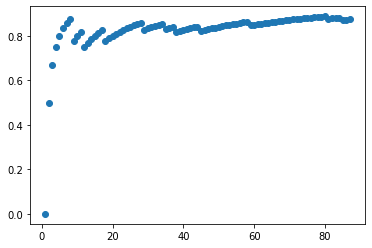

In [ ]:
losses = np.array(hist.history['loss'])

epochs = np.array(range(1, 88))
prediction_percentage = prediction[0:87].copy()
for i in range(87):
  prediction_percentage[i] = ((prediction[0:i] >= 0) == (y[0:i] == 1)).sum() / (i + 1)

plt.scatter(epochs, prediction_percentage)
plt.scatter(epochs, losses)

plt.show()

#### Ej 4

In [ ]:
alumno_normalizado = ((np.array([63, 55]) - media) / varianza).reshape(1, 2)
alumno_prediccion = model.predict(x = alumno_normalizado)
(alumno_prediccion >= 0).sum() # 0 si no aprueba, 1 si aprueba

0

#### Ej 5

In [ ]:
def calcular_ganancia_por_poblacion(i) for i in z])

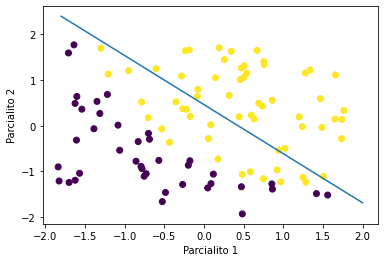

In [ ]:
params = model.get_weights()
w1 = params[0][0][0]
w2 = params[0][1][0]
b = params[1][0]

x1 = np.linspace(-1.8, 2, 70)
y1 = -((x1 * w1) - b) / w2

plt.plot(x1, y1)
plt.scatter(x_normalizada[:, 0], x_normalizada[:, 1], c=dataset[:, 2])
plt.xlabel("Parcialito 1")
plt.ylabel("Parcialito 2")

plt.show()